# IBM 推荐系统

在此 notebook 中，你将运用所学的推荐技能处理 IBM Watson Studio 平台的真实数据。 


你可以通过此 workspace 提交 notebook，或者在本地机器上操作并在下个页面提交 notebook。无论是哪种方式，都请确保代码符合项目[审阅标准](https://review.udacity.com/#!/rubrics/2632/view)。**请定期保存代码。**

跟着目录操作，你将能够创建多个不同的推荐方法，这些方法可以用于不同的情形。 


## 目录

I. [探索性数据分析](#Exploratory-Data-Analysis)<br>
II.[基于排名的推荐方法](#Rank)<br>
III.[基于用户-用户的协同过滤](#User-User)<br>
IV.[基于内容的推荐方法（选修内容）](#Content-Recs)<br>
V. [矩阵分解](#Matrix-Fact)<br>
VI.[其他内容和总结](#conclusions)

你可以在 notebook 的结尾处找到提交 notebook 的指南。首先导入必要的库并读取数据。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import project_tests as t
import pickle

%matplotlib inline

df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [2]:
# Show df_content to get an idea of the data
df_content.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


### <a class="anchor" id="Exploratory-Data-Analysis">第一部分：探索性数据分析</a>

通过以下字典和单元格了解数据的描述性统计信息。

`1.` 用户与数据集中的多少篇文章互动了？分布如何？以图表的形式描述每个用户与某篇文章互动的次数。

In [3]:
# 用户与数据集中的多少篇文章互动了?
len(np.unique(df['article_id']))

714

In [3]:
# 每个用户和多少篇文章互动过(从大到小排序)
articles_by_user = df.groupby(['email'])['article_id'].count().sort_values(ascending=False)
articles_by_user.head()

email
2b6c0f514c2f2b04ad3c4583407dccd0810469ee    364
77959baaa9895a7e2bdc9297f8b27c1b6f2cb52a    363
2f5c7feae533ce046f2cb16fb3a29fe00528ed66    170
a37adec71b667b297ed2440a9ff7dad427c7ac85    169
8510a5010a5d4c89f5b07baac6de80cd12cfaf93    160
Name: article_id, dtype: int64

In [23]:
articles_by_user.sum()

45976

In [33]:
list(articles_by_user)

[364,
 363,
 170,
 169,
 160,
 158,
 148,
 147,
 147,
 145,
 145,
 144,
 142,
 140,
 137,
 136,
 132,
 131,
 116,
 114,
 104,
 103,
 102,
 102,
 101,
 101,
 98,
 97,
 96,
 95,
 95,
 94,
 94,
 92,
 91,
 91,
 89,
 89,
 85,
 84,
 84,
 84,
 83,
 83,
 82,
 82,
 82,
 82,
 82,
 81,
 80,
 80,
 80,
 79,
 79,
 79,
 79,
 78,
 78,
 77,
 76,
 76,
 76,
 75,
 75,
 74,
 73,
 72,
 72,
 70,
 69,
 69,
 68,
 68,
 68,
 67,
 67,
 67,
 67,
 66,
 66,
 65,
 64,
 64,
 63,
 63,
 62,
 62,
 62,
 61,
 61,
 60,
 60,
 60,
 60,
 59,
 59,
 59,
 59,
 59,
 58,
 58,
 58,
 58,
 58,
 58,
 57,
 57,
 57,
 57,
 57,
 56,
 56,
 55,
 55,
 55,
 54,
 53,
 53,
 53,
 53,
 53,
 53,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 51,
 51,
 51,
 51,
 51,
 51,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 49,
 49,
 49,
 49,
 49,
 49,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 47,
 47,
 47,
 47,
 47,
 46,
 46,
 46,
 46,
 46,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 44,
 44,
 44,
 44,
 43,
 43,
 43,
 43,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 41,
 41,
 41,
 41,
 41,

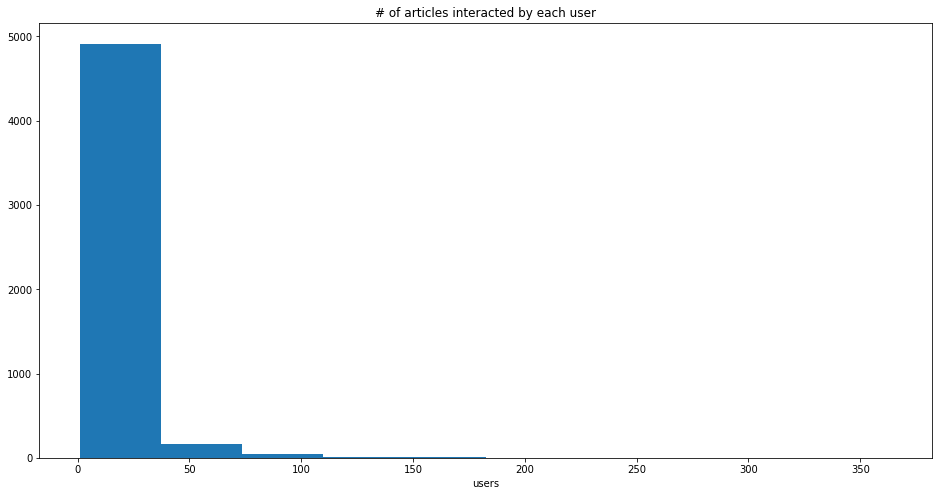

In [15]:
plt.figure(figsize=(16,8))
#plt.hist(x=list(articles_by_user), normed=False, alpha=1, label='articles');
plt.hist(x=list(articles_by_user),density=False);
#plt.legend(loc=2, prop={'size': 15});
plt.xlabel('users');
plt.title('# of articles interacted by each user');

In [16]:
articles_by_user.shape[0]/2

2574.0

In [24]:
articles_by_user[int(articles_by_user.shape[0]/2)]

3

In [4]:
# Fill in the median and maximum number of user_article interactios below

median_val = articles_by_user[int(articles_by_user.shape[0]/2)] 
print("50% of individuals interact with {} number of articles or fewer.".format(median_val))

max_views_by_user = articles_by_user[0] 
print("The maximum number of user-article interactions by any 1 user is {}".format(max_views_by_user))

50% of individuals interact with 3 number of articles or fewer.
The maximum number of user-article interactions by any 1 user is 364


`2.` 发现并移除 **df_content** dataframe 中的重复文章。

In [5]:
# Find and explore duplicate articles
df_content[df_content.duplicated('article_id') == True]

,doc_body,doc_description,doc_full_name,doc_status,article_id
365,Follow Sign in / Sign up Home About Insight Da...,During the seven-week Insight Data Engineering...,Graph-based machine learning,Live,50
692,Homepage Follow Sign in / Sign up Homepage * H...,One of the earliest documented catalogs was co...,How smart catalogs can turn the big data flood...,Live,221
761,Homepage Follow Sign in Get started Homepage *...,Today’s world of data science leverages data f...,Using Apache Spark as a parallel processing fr...,Live,398
970,This video shows you how to construct queries ...,This video shows you how to construct queries ...,Use the Primary Index,Live,577
971,Homepage Follow Sign in Get started * Home\r\n...,"If you are like most data scientists, you are ...",Self-service data preparation with IBM Data Re...,Live,232


In [6]:
df_content.shape

(1056, 5)

In [8]:
# Remove any rows that have the same article_id - only keep the first
df_content_u = df_content.drop_duplicates('article_id')
df_content_u.shape

(1051, 5)

`3.` 在以下单元格中查找：

**a.**用户与之互动的唯一文章数量。  
**b.**数据集中的唯一文章数量（无论用户是否与之互动了）。<br>
**c.**数据集中的唯一用户数量。（不包括空值）<br>
**d.**数据集中的用户-文章互动次数。

In [31]:
df.shape

(45993, 3)

In [6]:
# df去重 （说明有用户-文章的互动出现过多次）
df_u = df.drop_duplicates()
df_u.shape

(33682, 3)

In [9]:
unique_articles = len(np.unique(df['article_id'])) # The number of unique articles that have at least one interaction
print("The number of unique articles that have at least one interaction is {}".format(unique_articles))

total_articles = len(np.unique(df_content_u['article_id'])) # The number of unique articles on the IBM platform
print("The number of unique articles on the IBM platform is {}".format(total_articles))

unique_users = articles_by_user.shape[0] # The number of unique users
print("The number of unique users is {}".format(unique_users))

user_article_interactions = df.shape[0] # The number of user-article interactions
print("The number of user-article interactions is {}".format(user_article_interactions))

The number of unique articles that have at least one interaction is 714
The number of unique articles on the IBM platform is 1051
The number of unique users is 5148
The number of user-article interactions is 45993


`4.` 在以下单元格中查找查看次数最多的文章的 **article_id**，以及被查看频率。在与公司领导讨论后，`email_mapper` 函数被视为将用户映射到 ID 的合理方式。有少数几个空值，并且所有这些空值都可能属于一个用户（我们以这种方式使用以下函数存储了这些值）。

In [6]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column
# 把df里面的email转化成user_id, 注意：email的列被替换了，不存在了。

def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [9]:
# 每篇文章被多少人看过(从大到小排序)
views_by_article = df.groupby(['article_id'])['user_id'].count().sort_values(ascending=False)
views_by_article.head()

article_id
1429.0    937
1330.0    927
1431.0    671
1427.0    643
1364.0    627
Name: user_id, dtype: int64

In [10]:
views_by_article.index[0]

1429.0

In [11]:
views_by_article[1429.0]

937

In [12]:
most_viewed_article_id = str(views_by_article.index[0]) # The most viewed article in the dataset as a string with one value following the decimal 
max_views = views_by_article[1429.0] # The most viewed article in the dataset was viewed how many times?

In [13]:
## If you stored all your results in the variable names above, 
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


### <a class="anchor" id="Rank">第二部分：基于排名的推荐方法</a>

与之前的课程不同，我们没有关于用户是否喜欢某篇文章的评分。我们只知道用户与文章互动了。在这些情形下，文章的热门程度只能通过用户与文章的互动频率来判断。

`1.` 填写以下函数，使其返回前 **n** 篇文章，按照互动次数从高到低排序。使用以下测试测试你的函数。

In [57]:
# Tests when writing the funcitons （Ignore these code before the function)
views_by_article.index[0:5]

Float64Index([1429.0, 1330.0, 1431.0, 1427.0, 1364.0], dtype='float64', name='article_id')

In [66]:
df_art_tit = df[['article_id','title']].drop_duplicates()
df_art_tit.shape

(714, 2)

In [67]:
df_art_tit = df[['article_id','title']].drop_duplicates('article_id')
df_art_tit.shape

(714, 2)

上面两个的到的shape一样，说明df里不存在相同article_id但是不同title的情况。

In [68]:
# 找到前5个id对应的title，但是排序不一样！
df_art_tit[df_art_tit['article_id'].isin(views_by_article.index[0:5])]

,article_id,title
2,1429.0,use deep learning for image classification
29,1364.0,predicting churn with the spss random tree alg...
37,1431.0,visualize car data with brunel
42,1427.0,"use xgboost, scikit-learn & ibm watson machine..."
66,1330.0,insights from new york car accident reports


In [89]:
list(df_art_tit[df_art_tit['article_id'] == 1429.0]['title'])[0]

'use deep learning for image classification'

In [85]:
np.where(df_art_tit['article_id'] == 1429.0)

(array([2]),)

In [90]:
top_articles = []
for art_id in views_by_article.index[0:5]:
    tit_name = list(df_art_tit[df_art_tit['article_id'] == art_id]['title'])[0]
    top_articles.append(tit_name)
    
top_articles

['use deep learning for image classification',
 'insights from new york car accident reports',
 'visualize car data with brunel',
 'use xgboost, scikit-learn & ibm watson machine learning apis',
 'predicting churn with the spss random tree algorithm']

In [3]:
##### 输入需要返回的文章个数n，输出top n 的文章title(Return the top article titles from df (not df_content)）
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Your code here
    # 按照每篇文章被浏览的次数给文章排序
    views_by_article = df.groupby(['article_id'])['user_id'].count().sort_values(ascending=False)
    
    # 从df里生成article_id和title的键值对（方便后续查找title）
    df_art_tit = df[['article_id','title']].drop_duplicates()
    
    top_articles = []
    
    # 按照前n个文章的id，找出对应的title，放入top_articles里
    for art_id in views_by_article.index[0:n]:
        tit_name = list(df_art_tit[df_art_tit['article_id'] == art_id]['title'])[0]
        top_articles.append(tit_name)

    return top_articles # Return the top article titles from df (not df_content)

##### 输入需要返回的文章个数n，输出top n 的文章ID
def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article ids（此处是返回id，不是title）
    
    '''
    # Your code here
    # 按照每篇文章被浏览的次数给文章排序
    views_by_article = df.groupby(['article_id'])['user_id'].count().sort_values(ascending=False)
    
    top_articles = views_by_article.index[0:n]
 
    return top_articles # Return the top article ids

In [4]:
print(get_top_articles(10))
print(get_top_article_ids(10))

['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model']
Float64Index([1429.0, 1330.0, 1431.0, 1427.0, 1364.0, 1314.0, 1293.0, 1170.0,
              1162.0, 1304.0],
             dtype='float64', name='article_id')


In [13]:
# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
t.sol_2_test(get_top_articles)

Your top_5 looks like the solution list! Nice job.
Your top_10 looks like the solution list! Nice job.
Your top_20 looks like the solution list! Nice job.


### <a class="anchor" id="User-User">第三部分：基于用户-用户的协同过滤</a>


`1.` 使用以下函数调整 **df** dataframe 的形状，使行表示用户，并使列表示文章。  

* 每个**用户**只能在每**行**中出现一次。


* 每篇**文章**只能在每**列**中出现一次。  


* **如果用户与某篇文章互动了，则在该文章所在的列与用户行形成的单元格中填充 1**。无论用户与文章互动了多少次，都填充 1。  


* **如果用户与文章没有互动，则在该文章所在的列与用户行形成的单元格中填充 0**。 

使用以下测试检验矩阵的基本结构是否与解答中的结构一致。

In [17]:
# Tests when writing the funcitons （Ignore these code before the function)
# df去重 （无论用户与文章互动了多少次，只留一次）
df_u = df.drop_duplicates()
df_u.shape

(33682, 3)

In [18]:
df_new = df_u[['article_id','user_id']]
df_new['view'] = 1
df_new.shape

(33682, 3)

In [19]:
df_new.head()

,article_id,user_id,view
0,1430.0,1,1
1,1314.0,2,1
2,1429.0,3,1
3,1338.0,4,1
4,1276.0,5,1


In [100]:
user_item_mtx = pd.pivot_table(df_new, values='view', index=['user_id'], columns=['article_id'], aggfunc=np.max)
user_item_mtx.head()

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
user_item_mtx.shape

(5149, 714)

In [110]:
user_item_mtx = user_item_mtx.fillna(0)

In [113]:
user_item_mtx = user_item_mtx.astype("int")

In [114]:
user_item_mtx.head()

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# create the user-article matrix with 1's and 0's

def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    # Fill in the function here
    # df去重 （无论用户与文章互动了多少次，只留一次）
    df_u = df.drop_duplicates()
    
    # 只留下'article_id','user_id'，添加一列view，全都赋值为1（为了后续的pivot计算）
    df_new = df_u[['article_id','user_id']]
    df_new['view'] = 1
    
    # 用pivot_table把user-item展开（注意没有配对的地方都是NaN）有互动的地方，生成的是1.0
    user_item_mtx = pd.pivot_table(df_new, values='view', index=['user_id'], columns=['article_id'], aggfunc=np.max)
    
    # 用0填充所有NaN （如果用户与文章没有互动，则在该文章所在的列与用户行形成的单元格中填充 0）
    user_item_mtx = user_item_mtx.fillna(0)
    
    # 把float型转换成int型，得到1和0的矩阵
    user_item = user_item_mtx.astype("int")
    
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df)

In [8]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` 完成以下函数，该函数应该接受 user_id，并提供与该用户最相似的有序用户列表（从最相似到最不相似）。返回的列表不应包含提供的 user_id，因为我们知道每个用户都与其本身相似。因为每个用户的结果是二元的，所以建议用两个用户的点积表示相似性。 

使用测试测试你的函数。

In [128]:
######## 这些都是用来写函数用的测试单元，ignore～
user_id_view = np.array(user_item)

In [131]:
# 方法1:求所有用户和用户之间的相似度
dot_prod_users = user_item.dot(np.transpose(user_item))
dot_prod_users

user_id,1,2,3,4,5,6,7,8,9,10,...,5140,5141,5142,5143,5144,5145,5146,5147,5148,5149
user_id,,,,,,,,,,,,,,,,,,,,,
1,36,2,6,3,0,4,1,6,4,7,...,7,0,0,4,0,1,0,0,0,0
2,2,6,1,3,0,2,0,1,2,4,...,2,0,0,0,0,1,0,0,0,0
3,6,1,40,5,1,7,1,5,2,5,...,7,0,0,5,0,2,0,0,0,0
4,3,3,5,26,3,8,0,8,1,4,...,6,0,0,2,0,2,1,0,1,0
5,0,0,1,3,3,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,2,7,8,1,18,1,6,1,4,...,4,0,0,3,0,0,1,0,0,0
7,1,0,1,0,0,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,6,1,5,8,3,6,0,57,6,9,...,8,1,2,2,0,0,1,0,1,0
9,4,2,2,1,0,1,0,6,30,4,...,11,0,2,1,0,0,0,0,0,1


In [136]:
dot_prod_user[1].sort_values(ascending=False)

user_id
1       36
3933    35
23      17
3782    17
203     15
4459    15
131     14
3870    14
46      13
4201    13
5041    12
49      12
3697    12
395     12
3910    11
322     11
3622    11
242     11
4642    10
290     10
2982    10
912     10
3540    10
98      10
754     10
3764    10
256      9
52       9
268      9
40       9
        ..
2906     0
2909     0
2954     0
2910     0
2952     0
2951     0
2950     0
2947     0
2945     0
2944     0
2943     0
2942     0
2939     0
2938     0
2937     0
2936     0
2933     0
2931     0
2930     0
2929     0
2928     0
2927     0
2923     0
2922     0
2921     0
2920     0
2918     0
2916     0
2911     0
2575     0
Name: 1, Length: 5149, dtype: int64

In [22]:
user_item.head()

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# 方法2: 求指定用户和所有用户之间的相似度

# 找到userid对应的user_item的行
user_idx = np.where(user_item.index == 1)[0][0]
user_idx
#user_item[user_item['user_id'] == '1']
#user_item.iloc[0,:]

0

In [41]:
user1_items_view = user_item.iloc[user_idx,:]
user1_items_view

article_id
0.0       0
2.0       0
4.0       0
8.0       0
9.0       0
12.0      0
14.0      0
15.0      0
16.0      0
18.0      0
20.0      0
25.0      0
26.0      0
28.0      0
29.0      0
30.0      0
32.0      0
33.0      0
34.0      0
36.0      0
39.0      0
40.0      0
43.0      1
48.0      0
50.0      0
51.0      0
53.0      0
54.0      0
57.0      0
58.0      0
         ..
1412.0    0
1414.0    0
1415.0    0
1416.0    0
1418.0    0
1419.0    0
1420.0    0
1421.0    0
1422.0    0
1423.0    0
1424.0    0
1425.0    0
1426.0    0
1427.0    1
1428.0    0
1429.0    1
1430.0    1
1431.0    1
1432.0    0
1433.0    0
1434.0    0
1435.0    0
1436.0    1
1437.0    0
1439.0    1
1440.0    0
1441.0    0
1442.0    0
1443.0    0
1444.0    0
Name: 1, Length: 714, dtype: int64

In [42]:
# 求指定用户和所有用户之间的相似度
dot_prod_user1 = user1_items_view.dot(np.transpose(user_item))

In [45]:
dot_prod_user1_sort = dot_prod_user1.sort_values(ascending = False)
dot_prod_user1_sort

user_id
1       36
3933    35
23      17
3782    17
203     15
4459    15
131     14
3870    14
46      13
4201    13
5041    12
49      12
3697    12
395     12
3910    11
322     11
3622    11
242     11
4642    10
290     10
2982    10
912     10
3540    10
98      10
754     10
3764    10
256      9
52       9
268      9
40       9
        ..
2906     0
2909     0
2954     0
2910     0
2952     0
2951     0
2950     0
2947     0
2945     0
2944     0
2943     0
2942     0
2939     0
2938     0
2937     0
2936     0
2933     0
2931     0
2930     0
2929     0
2928     0
2927     0
2923     0
2922     0
2921     0
2920     0
2918     0
2916     0
2911     0
2575     0
Name: 1, Length: 5149, dtype: int64

In [57]:
dot_prod_user1_list = list(dot_prod_user1_sort.index)
dot_prod_user1_list

[1,
 3933,
 23,
 3782,
 203,
 4459,
 131,
 3870,
 46,
 4201,
 5041,
 49,
 3697,
 395,
 3910,
 322,
 3622,
 242,
 4642,
 290,
 2982,
 912,
 3540,
 98,
 754,
 3764,
 256,
 52,
 268,
 40,
 371,
 3596,
 621,
 21,
 273,
 3637,
 5138,
 135,
 204,
 3784,
 3775,
 1355,
 4785,
 4932,
 4134,
 3621,
 3651,
 3483,
 696,
 4293,
 488,
 4892,
 3532,
 334,
 4038,
 184,
 1897,
 619,
 765,
 2926,
 214,
 249,
 4778,
 186,
 3141,
 4755,
 3136,
 64,
 3740,
 54,
 4934,
 3684,
 125,
 72,
 3856,
 4484,
 445,
 58,
 3632,
 60,
 67,
 2790,
 5013,
 4206,
 3024,
 4209,
 665,
 5079,
 656,
 5140,
 4706,
 4774,
 288,
 187,
 10,
 38,
 4471,
 4824,
 2975,
 223,
 2981,
 3693,
 90,
 193,
 807,
 3006,
 3169,
 195,
 409,
 211,
 87,
 235,
 330,
 3197,
 244,
 324,
 4595,
 4933,
 2430,
 3408,
 295,
 4883,
 4543,
 3572,
 3578,
 3358,
 362,
 3354,
 113,
 3353,
 111,
 1040,
 263,
 261,
 1059,
 3485,
 170,
 379,
 4277,
 689,
 733,
 591,
 3818,
 4404,
 69,
 2161,
 4225,
 511,
 3949,
 3,
 28,
 3879,
 3794,
 8,
 2903,
 3305,
 155,
 

In [60]:
np.setdiff1d(dot_prod_user1_list, [1], assume_unique=True)

array([3933,   23, 3782, ..., 2916, 2911, 2575])

In [8]:
####### 为输入用户提供最相似用户（不包括本身）
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    # 找到userid对应的user_item的行
    user_idx = np.where(user_item.index == user_id)[0][0]
    # 取出该用户所在的行（该用户和所有文章的交互）
    user1_items_view = user_item.iloc[user_idx,:]
    # 用该用户所在的行（1*714） 点积 所有用户和文章的交互矩阵的转置矩阵（714*5149），得到该用户与所有用户的相似度（1*5149）
    dot_prod_user1 = user1_items_view.dot(np.transpose(user_item))

    # sort by similarity
    dot_prod_user1_sort = dot_prod_user1.sort_values(ascending = False)

    # create list of just the ids
    dot_prod_user1_list = list(dot_prod_user1_sort.index)
   
    # remove the own user's id
    most_similar_users = np.setdiff1d(dot_prod_user1_list, [user_id], assume_unique=True)
       
    return most_similar_users # return a list of the users in order from most to least similar
        

In [9]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933   23 3782  203 4459  131 3870   46 4201 5041]
The 5 most similar users to user 3933 are: [   1   23 3782 4459  203]
The 3 most similar users to user 46 are: [4201   23 3782]


`3.` 创建了为每个用户提供最相似用户的函数后，你需要使用这些用户查找可以推荐的文章。完成以下函数，以返回向每个用户推荐的文章。

In [24]:
# 以下是为了写function的测试，Ingore～～
# 从df里生成article_id和title的键值对（方便后续查找title）
df_art_tit = df[['article_id','title']].drop_duplicates()

In [110]:
#article_ids = [1430.0, 1314.0, 1429.0, 1432.0]
article_ids = ['1320.0', '232.0', '844.0'] # article_ids的类型这2个好像都可以
list(df_art_tit[df_art_tit['article_id'].isin(article_ids)]['title'])

['housing (2015): united states demographic measures',
 'use the cloudant-spark connector in python notebook',
 'self-service data preparation with ibm data refinery']

In [111]:
article_names = []
for art_id in article_ids:
    art_title = list(df_art_tit[df_art_tit['article_id'] == float(art_id)]['title'])[0]  #这里就必须转化类型了
    article_names.append(art_title)
article_names

['housing (2015): united states demographic measures',
 'self-service data preparation with ibm data refinery',
 'use the cloudant-spark connector in python notebook']

In [145]:
# 用来测试get_user_articles函数的：
user_id = 20
# 找到userid对应的user_item的行
user_idx = np.where(user_item.index == user_id)[0][0]
# 取出该用户所在的行（该用户和所有文章的交互）
user1_items_view = user_item.iloc[user_idx,:]
# 取出看过的文章id
view_art_ids = user1_items_view[user1_items_view == 1].index
view_art_ids

Float64Index([232.0, 844.0, 1320.0], dtype='float64', name='article_id')

In [ ]:
# 验证df和df_content里的article_id是否一致：

In [156]:
a = list(df_art_tit['article_id'])
b = list(df_content_u['article_id'])
np.setdiff1d(a, b, assume_unique=False).shape

(277,)

In [155]:
np.setdiff1d(b, a, assume_unique=False).shape

(614,)

Note：df_content里的article_id不全都在df里（这个很正常，因为有的文章没有被任何人看过）
但是，df里的article_id竟然不全都在df_content里。。。（这个就很奇怪了！！难道df_content不包含所有的文章id和名称？？？）

In [18]:
df_content_u[df_content_u['article_id'].isin(view_art_ids.astype('int64'))]
# 难怪从df_content_u里找到的文章不全。。。

NameError: name 'view_art_ids' is not defined

In [93]:
# 所以还是只能从df_art_tit里找title
list(df_art_tit[df_art_tit['article_id'] == 1430.0]['title'])[0]

'using pixiedust for fast, flexible, and easier data analysis and experimentation'

In [191]:
#*** 以下测试for user_user_recs(user_id, m=10)函数：
user_id = 1
user_viewed_ids = get_user_articles(user_id)[0]
user_viewed_ids

Index(['43.0', '109.0', '151.0', '268.0', '310.0', '329.0', '346.0', '390.0',
       '494.0', '525.0', '585.0', '626.0', '668.0', '732.0', '768.0', '910.0',
       '968.0', '981.0', '1052.0', '1170.0', '1183.0', '1185.0', '1232.0',
       '1293.0', '1305.0', '1363.0', '1368.0', '1391.0', '1400.0', '1406.0',
       '1427.0', '1429.0', '1430.0', '1431.0', '1436.0', '1439.0'],
      dtype='object', name='article_id')

In [192]:
similar_users = find_similar_users(user_id)
similar_users

array([3933,   23, 3782, ..., 2916, 2911, 2575])

In [197]:
# 相似的用户看了什么文章
neighbor_viewed_ids = list(get_user_articles(23)[0])
len(neighbor_viewed_ids)

135

In [204]:
# 形似的用户看的文章，该用户没看过的
rec_id_temp = np.setdiff1d(neighbor_viewed_ids, user_viewed_ids, assume_unique=False)
rec_id_temp

array(['1000.0', '1014.0', '1025.0', '1051.0', '108.0', '1101.0', '1148.0',
       '1159.0', '1160.0', '1162.0', '1163.0', '1164.0', '1165.0',
       '1166.0', '1171.0', '1172.0', '1176.0', '1181.0', '12.0', '120.0',
       '124.0', '1276.0', '1277.0', '1291.0', '1298.0', '1299.0', '1304.0',
       '131.0', '1314.0', '1330.0', '1332.0', '1336.0', '1338.0', '1343.0',
       '1351.0', '1354.0', '1357.0', '1360.0', '1364.0', '1366.0',
       '1367.0', '1386.0', '1393.0', '1395.0', '1396.0', '14.0', '1423.0',
       '1428.0', '1432.0', '16.0', '164.0', '193.0', '194.0', '2.0',
       '210.0', '213.0', '221.0', '223.0', '236.0', '237.0', '241.0',
       '252.0', '253.0', '26.0', '28.0', '283.0', '29.0', '295.0', '299.0',
       '302.0', '316.0', '33.0', '336.0', '337.0', '339.0', '348.0',
       '359.0', '362.0', '367.0', '409.0', '422.0', '444.0', '477.0',
       '482.0', '50.0', '510.0', '517.0', '524.0', '617.0', '634.0',
       '641.0', '656.0', '658.0', '665.0', '682.0', '693.0', '720.

In [211]:
recs = np.array([])
rec_id = np.setdiff1d(rec_id_temp, recs, assume_unique=False)
rec_id

array(['1000.0', '1014.0', '1025.0', '1051.0', '108.0', '1101.0', '1148.0',
       '1159.0', '1160.0', '1162.0', '1163.0', '1164.0', '1165.0',
       '1166.0', '1171.0', '1172.0', '1176.0', '1181.0', '12.0', '120.0',
       '124.0', '1276.0', '1277.0', '1291.0', '1298.0', '1299.0', '1304.0',
       '131.0', '1314.0', '1330.0', '1332.0', '1336.0', '1338.0', '1343.0',
       '1351.0', '1354.0', '1357.0', '1360.0', '1364.0', '1366.0',
       '1367.0', '1386.0', '1393.0', '1395.0', '1396.0', '14.0', '1423.0',
       '1428.0', '1432.0', '16.0', '164.0', '193.0', '194.0', '2.0',
       '210.0', '213.0', '221.0', '223.0', '236.0', '237.0', '241.0',
       '252.0', '253.0', '26.0', '28.0', '283.0', '29.0', '295.0', '299.0',
       '302.0', '316.0', '33.0', '336.0', '337.0', '339.0', '348.0',
       '359.0', '362.0', '367.0', '409.0', '422.0', '444.0', '477.0',
       '482.0', '50.0', '510.0', '517.0', '524.0', '617.0', '634.0',
       '641.0', '656.0', '658.0', '665.0', '682.0', '693.0', '720.

In [212]:
recs = np.unique(np.concatenate([rec_id, recs], axis=0))
recs

array(['1000.0', '1014.0', '1025.0', '1051.0', '108.0', '1101.0', '1148.0',
       '1159.0', '1160.0', '1162.0', '1163.0', '1164.0', '1165.0',
       '1166.0', '1171.0', '1172.0', '1176.0', '1181.0', '12.0', '120.0',
       '124.0', '1276.0', '1277.0', '1291.0', '1298.0', '1299.0', '1304.0',
       '131.0', '1314.0', '1330.0', '1332.0', '1336.0', '1338.0', '1343.0',
       '1351.0', '1354.0', '1357.0', '1360.0', '1364.0', '1366.0',
       '1367.0', '1386.0', '1393.0', '1395.0', '1396.0', '14.0', '1423.0',
       '1428.0', '1432.0', '16.0', '164.0', '193.0', '194.0', '2.0',
       '210.0', '213.0', '221.0', '223.0', '236.0', '237.0', '241.0',
       '252.0', '253.0', '26.0', '28.0', '283.0', '29.0', '295.0', '299.0',
       '302.0', '316.0', '33.0', '336.0', '337.0', '339.0', '348.0',
       '359.0', '362.0', '367.0', '409.0', '422.0', '444.0', '477.0',
       '482.0', '50.0', '510.0', '517.0', '524.0', '617.0', '634.0',
       '641.0', '656.0', '658.0', '665.0', '682.0', '693.0', '720.

In [10]:
##### 根据article_ids list，返回相应的title（从df里提取的title）
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids （float或者str类型都可以，方法里会转换成float的）
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
                    ***为什么要从df里查找title，而不是用df_content_u呢？？？
    '''
    # Your code here
    
    # 从df里生成article_id和title的键值对（方便后续查找title） ***这个可以提取到函数外面生成，因为多个地方都用到了。
    df_art_tit = df[['article_id','title']].drop_duplicates()
    
    # 在df_art_tit里查找article_ids list里的id对应的title
    # 如果直接查找，顺序可能会乱掉
    # article_names = list(df_art_tit[df_art_tit['article_id'].isin(article_ids)]['title'])
    
    # 用循环来一个一个找，保证article_ids的id和article_names的title是一一对应的
    article_names = []
    for art_id in article_ids:
        art_title = list(df_art_tit[df_art_tit['article_id'] == float(art_id)]['title'])[0]
        article_names.append(art_title)
    
    return article_names # Return the article names associated with list of article ids


##### 输入用户id，返回该用户看过的文章id以及文章title（从df提取的文章title）
def get_user_articles(user_id, user_item=user_item, df=df):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
                    ***这里为什么又是从df_content_u获取文章title的呢？？？
                    ***实际上df_content_u不包含所有df里的文章，所以df_content_u不是文章的全集。。。（前面的答案是否有问题呢。。。）
                    ***这里我最终还是用的df里的title来返回（不然的话不是所有文章都能找到title）
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    # Your code here
    
    # 从df里生成article_id和title的键值对（方便后续查找title） ***这个可以提取到函数外面生成，因为多个地方都用到了。
    df_art_tit = df[['article_id','title']].drop_duplicates()
    
    # 找到userid对应的user_item的行
    user_idx = np.where(user_item.index == user_id)[0][0]
    
    # 取出该用户所在的行（该用户和所有文章的交互）
    user1_items_view = user_item.iloc[user_idx,:]
    
    # 取出看过的文章id
    article_ids = user1_items_view[user1_items_view == 1].index
    
    # 如果直接查找，顺序可能会乱掉
    # list(df_art_tit[df_art_tit['article_id'].isin(article_ids)]['article_id'])
    
    # 用循环来一个一个找，保证article_ids的id和article_names的title是一一对应的
    article_names = []
    for art_id in article_ids:
        art_title = list(df_art_tit[df_art_tit['article_id'] == art_id]['title'])[0]
        article_names.append(art_title)
    
    # 这时候的article_ids还是float型，需要转化成string类型（后面的测试用的是str类型）***不明白为什么一定要str。。。
    article_ids = article_ids.astype('str')
    
    return article_ids, article_names # return the ids and names


##### 输入user_id, 要推荐的文章数m，返回推荐的article_id list,如：['1024.0', '1176.0', '1305.0']
def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user 返回的是推荐的article_id
    ****这里也可以同时返回文章title，但是下面的测试会有问题，所以还是只返回article_id
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # Your code here
    
    # 该用户看过的文章id
    user_viewed_ids = list(get_user_articles(user_id)[0])
    
    # 与该用户相似的其他用户（按照相似度从大到小排序）
    similar_users = find_similar_users(user_id)
    
    recs = np.array([])
    
    for ngbr_id in similar_users:
        # 相邻的用户看了什么文章
        neighbor_viewed_ids = list(get_user_articles(ngbr_id)[0])
        
        # 相邻的用户看的文章，该用户没看过的
        rec_id_temp = np.setdiff1d(neighbor_viewed_ids, user_viewed_ids, assume_unique=False)
        
        # 准备推荐的文章，去掉已经加入推荐列表里的
        rec_id = np.setdiff1d(rec_id_temp, recs, assume_unique=False)
        
        # 把剩下可以推荐的文章加入推荐列表
        recs = np.unique(np.concatenate([rec_id, recs], axis=0))
        
        if len(recs) >= m:
            break;
            
    recs = list(recs)[0:m]    #只留下m篇文章,并且转换为list
    
    return recs # return your recommendations for this user_id    

In [22]:
user_user_recs(1, 10)

['1000.0',
 '1014.0',
 '1025.0',
 '1051.0',
 '108.0',
 '1101.0',
 '1148.0',
 '1159.0',
 '1160.0',
 '1162.0']

In [25]:
df_art_tit[df_art_tit['article_id'] == float('1014.0')]

,article_id,title
558,1014.0,1448 i ranked every intro to data science c...


In [222]:
df_content_u[df_content_u['article_id'] == 1014]

,doc_body,doc_description,doc_full_name,doc_status,article_id
1019,Follow Sign in / Sign up * Home\r\n * Dev\r\n ...,"A year ago, I dropped out of one of the best c...",I ranked every Intro to Data Science course on...,Live,1014


df里的title果然有和df_content_u里的doc_full_name不一样的文章。。。。

In [23]:
# Check Results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1

['recommender systems: approaches & algorithms',
 '1448    i ranked every intro to data science course on...\nName: title, dtype: object',
 'data tidying in data science experience',
 'a tensorflow regression model to predict house values',
 '520    using notebooks with pixiedust for fast, flexi...\nName: title, dtype: object',
 'airbnb data for analytics: mallorca reviews',
 'airbnb data for analytics: vancouver listings',
 'analyze facebook data using ibm watson and watson studio',
 'analyze accident reports on amazon emr spark',
 'analyze energy consumption in buildings']

In [24]:
# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


`4.` 现在我们将提高上述 **user_user_recs** 函数的一致性。  

* 当所有用户与给定用户的邻近程度都一样时，我们并非随意选择用户，而是先选择总互动次数最多的用户，然后选择互动次数第二多的用户。


* 当推荐的文章数量以低于 m 的数字开始并以高于 m的数字结束时，我们并非随意选择文章，而是先选择总互动次数最多的文章，然后选择总互动次数第二多的文章。你可以利用之前编写的 **top_articles** 函数获得这种排名。

In [ ]:
######## 这些都是用来写函数用的测试单元，ignore～

In [29]:
user_id = 1
# 找到userid对应的user_item的行
user_idx = np.where(user_item.index == user_id)[0][0]
# 取出该用户所在的行（该用户和所有文章的交互）
user1_items_view = user_item.iloc[user_idx,:]
# 用该用户所在的行（1*714） 点积 所有用户和文章的交互矩阵的转置矩阵（714*5149），得到该用户与所有用户的相似度（1*5149）
dot_prod_user1 = user1_items_view.dot(np.transpose(user_item))
dot_prod_user1.head()

user_id
1    36
2     2
3     6
4     3
5     0
Name: 1, dtype: int64

In [31]:
# 每个用户和多少篇文章互动过
articles_by_user = df.groupby(['user_id'])['article_id'].count()
articles_by_user.head()

user_id
1    47
2     6
3    82
4    45
5     5
Name: article_id, dtype: int64

In [44]:
# 把用户与其他所有用户的相似度矩阵dot_prod_user1转换成dataframe
similarity_user1_df = dot_prod_user1.to_frame(name='similarity')
similarity_user1_df['neighbor_id'] = similarity_user1_df.index
similarity_user1_df

,similarity,neighbor_id
user_id,,
1,36,1
2,2,2
3,6,3
4,3,4
5,0,5
6,4,6
7,1,7
8,6,8
9,4,9


In [45]:
# 把每个用户看了多少篇文章articles_by_user转换成dataframe
articles_by_user_df = articles_by_user.to_frame(name='num_interactions')
articles_by_user_df['neighbor_id'] = articles_by_user_df.index
articles_by_user_df

,num_interactions,neighbor_id
user_id,,
1,47,1
2,6,2
3,82,3
4,45,4
5,5,5
6,19,6
7,4,7
8,82,8
9,32,9


In [51]:
# 把similarity和num_interactions拼成一个dataframe
neighbors_df = similarity_user1_df.merge(articles_by_user_df,on = 'neighbor_id',how = 'left')
neighbors_df

,similarity,neighbor_id,num_interactions
0,36,1,47
1,2,2,6
2,6,3,82
3,3,4,45
4,0,5,5
5,4,6,19
6,1,7,4
7,6,8,82
8,4,9,32
9,7,10,22


In [52]:
neighbors_df = neighbors_df.sort_values(by=['similarity','num_interactions'], ascending=(False, False))
neighbors_df

,similarity,neighbor_id,num_interactions
0,36,1,47
3932,35,3933,45
22,17,23,364
3781,17,3782,363
202,15,203,160
4458,15,4459,158
130,14,131,145
3869,14,3870,144
45,13,46,63
4200,13,4201,61


In [53]:
neighbors_df.shape

(5149, 3)

In [55]:
neighbors_df = neighbors_df.drop(neighbors_df[neighbors_df['neighbor_id'] == user_id].index)
neighbors_df

,similarity,neighbor_id,num_interactions
3932,35,3933,45
22,17,23,364
3781,17,3782,363
202,15,203,160
4458,15,4459,158
130,14,131,145
3869,14,3870,144
45,13,46,63
4200,13,4201,61
48,12,49,147


In [56]:
neighbors_df.shape

(5148, 3)

In [ ]:
# 以下测试for：user_user_recs_part2

In [48]:
# df里一共有多少文章
unique_articles = len(np.unique(df['article_id']))
    # 所有文章按照总互动次数排序(供后面使用)
interaction_by_article_sort = list(get_top_article_ids(unique_articles).astype('str'))
interaction_by_article_sort

['1429.0',
 '1330.0',
 '1431.0',
 '1427.0',
 '1364.0',
 '1314.0',
 '1293.0',
 '1170.0',
 '1162.0',
 '1304.0',
 '1436.0',
 '1271.0',
 '1398.0',
 '43.0',
 '1351.0',
 '1393.0',
 '1185.0',
 '1160.0',
 '1354.0',
 '1368.0',
 '1305.0',
 '1338.0',
 '1336.0',
 '1165.0',
 '1172.0',
 '151.0',
 '1276.0',
 '1432.0',
 '1430.0',
 '1052.0',
 '124.0',
 '1343.0',
 '1163.0',
 '1400.0',
 '390.0',
 '1164.0',
 '20.0',
 '732.0',
 '1017.0',
 '260.0',
 '164.0',
 '681.0',
 '1054.0',
 '1437.0',
 '1053.0',
 '1360.0',
 '1174.0',
 '1171.0',
 '600.0',
 '1396.0',
 '1332.0',
 '1274.0',
 '109.0',
 '237.0',
 '1296.0',
 '1166.0',
 '1282.0',
 '1391.0',
 '108.0',
 '1386.0',
 '1367.0',
 '1324.0',
 '1394.0',
 '1025.0',
 '542.0',
 '1176.0',
 '241.0',
 '1183.0',
 '1422.0',
 '482.0',
 '1320.0',
 '116.0',
 '12.0',
 '250.0',
 '1423.0',
 '98.0',
 '415.0',
 '268.0',
 '812.0',
 '162.0',
 '1328.0',
 '1186.0',
 '730.0',
 '33.0',
 '57.0',
 '969.0',
 '1426.0',
 '1047.0',
 '1405.0',
 '939.0',
 '409.0',
 '1424.0',
 '120.0',
 '981.0',
 '59

In [49]:
rec_test = ['1162.0', '1304.0', '1364.0', '1024.0', '1170.0', '1431.0']
f = lambda x : interaction_by_article_sort.index(x)
rec_test.sort(key=f)
print(rec_test)

['1431.0', '1364.0', '1170.0', '1162.0', '1304.0', '1024.0']


In [34]:
l1 = [4, 8, 7, 6]
l2 = [6, 4]

f = lambda x : l1.index(x)
l2.sort(key=f)
print(l2)

[4, 6]


In [39]:
itemindex = np.argwhere(interaction_by_article_sort == 1330.0)  # numpy的数据类型，查找index
print (itemindex)

[[1]]


In [11]:
##### 输入一个用户id，返回与ta相邻的用户df，里面包含邻居的相似度，以及该邻居看过的所有文章数（不去重）
##### 当所有用户与给定用户的邻近程度都一样时，我们并非随意选择用户，而是先选择总互动次数最多的用户，然后选择互动次数第二多的用户。
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                                    *** 这里注释有问题，不全。意思是返回该邻居看过的所有文章数，如果看的文章有重复，看几次计算几次
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    # Your code here
    
    # 找到userid对应的user_item的行
    user_idx = np.where(user_item.index == user_id)[0][0]
    # 取出该用户所在的行（该用户和所有文章的交互）
    user1_items_view = user_item.iloc[user_idx,:]
    # 用该用户所在的行（1*714） 点积 所有用户和文章的交互矩阵的转置矩阵（714*5149），得到该用户与所有用户的相似度（1*5149）
    dot_prod_user1 = user1_items_view.dot(np.transpose(user_item))
    
    # 把用户与其他所有用户的相似度矩阵dot_prod_user1转换成dataframe
    similarity_user1_df = dot_prod_user1.to_frame(name='similarity')
    similarity_user1_df['neighbor_id'] = similarity_user1_df.index
    
    
    # 每个用户和多少篇文章互动过(不去重)
    articles_by_user = df.groupby(['user_id'])['article_id'].count()
    
    # 把每个用户看了多少篇文章articles_by_user转换成dataframe
    articles_by_user_df = articles_by_user.to_frame(name='num_interactions')
    articles_by_user_df['neighbor_id'] = articles_by_user_df.index
    
    
    # 把similarity和num_interactions拼成一个dataframe
    neighbors_df = similarity_user1_df.merge(articles_by_user_df,on = 'neighbor_id',how = 'left')
    
    # sort the neighbors_df by the similarity and then by number of interactions 
    neighbors_df = neighbors_df.sort_values(by=['similarity','num_interactions'], ascending=(False, False))
    
    # 去掉该用户自己的那一行
    neighbors_df = neighbors_df.drop(neighbors_df[neighbors_df['neighbor_id'] == user_id].index)
    
    return neighbors_df # Return the dataframe specified in the doc_string


##### 输入一个用户id，得到推荐的m篇文章
# 当推荐的文章数量以低于 m 的数字开始并以高于 m的数字结束时，我们并非随意选择文章，而是先选择总互动次数最多的文章，然后选择总互动次数第二多的文章。你可以利用之前编写的 top_articles 函数获得这种排名。
def user_user_recs_part2(user_id, m=10, df=df):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    # Your code here
    
    # 该用户看过的文章id
    user_viewed_ids = list(get_user_articles(user_id)[0])
    
    # 与该用户相似的其他用户（按照升级版的函数get_top_sorted_users，得到相似度及num_interactions排序的df）
    neighbors_df = get_top_sorted_users(user_id)
    
    
    # df里一共有多少文章
    unique_articles = len(np.unique(df['article_id']))
    # 所有文章按照总互动次数排序
    interaction_by_article_sort = list(get_top_article_ids(unique_articles).astype('str'))
    # 建立一个函数：根据x查找interaction_by_article_sort的索引（供后面sort用）
    f = lambda x : interaction_by_article_sort.index(x)
    
    recs = np.array([])
    
    for ngbr_id in neighbors_df['neighbor_id']:
        # 相邻的用户看了什么文章
        neighbor_viewed_ids = list(get_user_articles(ngbr_id)[0])
        
        # 相邻的用户看的文章，该用户没看过的
        rec_id_temp = np.setdiff1d(neighbor_viewed_ids, user_viewed_ids, assume_unique=False)
        
        # 准备推荐的文章，去掉已经加入推荐列表里的
        rec_id = list(np.setdiff1d(rec_id_temp, recs, assume_unique=False))
        
        # 把准备推荐的文章，按照文章的总互动次数排序
        rec_id.sort(key=f)
        
        # 把剩下可以推荐的文章加入推荐列表
        recs = np.unique(np.concatenate([rec_id, recs], axis=0))
        
        if len(recs) >= m:
            break;
            
    recs = list(recs)[0:m]    #只留下m篇文章id,并且转换为list
    
    rec_names = get_article_names(recs)  #找到文章的title，赋值给rec_names
    
    return recs, rec_names


In [51]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
['1024.0', '1085.0', '109.0', '1150.0', '1151.0', '1152.0', '1153.0', '1154.0', '1157.0', '1160.0']

The top 10 recommendations for user 20 are the following article names:
['using deep learning to reconstruct high-resolution audio', 'airbnb data for analytics: chicago listings', 'tensorflow quick tips', 'airbnb data for analytics: venice calendar', 'airbnb data for analytics: venice listings', 'airbnb data for analytics: venice reviews', 'airbnb data for analytics: vienna calendar', 'airbnb data for analytics: vienna listings', 'airbnb data for analytics: washington d.c. listings', 'analyze accident reports on amazon emr spark']


`5.` 请利用上述函数正确填写以下字典。然后对照解答检验该字典。按照以下注释提供必要的代码。

In [65]:
get_top_sorted_users(131)['neighbor_id'].iloc[9]

242

In [67]:
### Tests with a dictionary of results

user1_most_sim = get_top_sorted_users(1)['neighbor_id'].iloc[0] # Find the user that is most similar to user 1 
user131_10th_sim = get_top_sorted_users(131)['neighbor_id'].iloc[9] # Find the 10th most similar user to user 131

In [68]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim,
}

t.sol_5_test(sol_5_dict)

This all looks good!  Nice job!


`6.` 如果是新用户，你可以使用上述哪个函数做出推荐？请解释。你能想到更好的推荐方法吗？在以下单元格中解释向新用户做出推荐的更好方法。

**请在此处填写答案。**
如果是新用户，没有看过任何文章，所以不能用基于用户的协同过滤法。只有把最top的文章推荐给他/她。

`7.` 利用现有函数向以下新用户提供前 10 篇推荐文章。你可以对照我们的解答测试你的函数，确保在如何做出推荐方面与我们的想法一致。

In [73]:
new_user = '0.0'

# What would your recommendations be for this new user '0.0'?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 
new_user_recs = get_top_article_ids(10).astype('str') # Your recommendations here



In [72]:
get_top_article_ids(10).astype('str')

Index(['1429.0', '1330.0', '1431.0', '1427.0', '1364.0', '1314.0', '1293.0',
       '1170.0', '1162.0', '1304.0'],
      dtype='object', name='article_id')

In [74]:
assert set(new_user_recs) == set(['1314.0','1429.0','1293.0','1427.0','1162.0','1364.0','1304.0','1170.0','1431.0','1330.0']), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")

That's right!  Nice job!


### <a class="anchor" id="Content-Recs">第四部分：基于内容的推荐方法（选修内容）</a>

另一种推荐方法是对与某个术语相关的文章进行从高到低排名。内容可以是 **doc_body**、**doc_description** 或**doc_full_name**。创建基于内容的推荐系统并非只有一种方式，尤其是考虑到每列都包含与内容相关的信息。  

`1.` 使用以下函数主体创建一个基于内容的推荐系统。由于这个推荐系统的正确答案不止一个，所以没有提供测试函数。如果你想尝试一种需要更多输入值的方法，可以更改函数输入。当前的输入值考虑到了你可能会使用基于内容的推荐方法。此外，你可能会使用满足“内容标准”的最热门推荐方法，总之，你在做出这些推荐时可以灵活选择方法。

### 这部分并非通过项目必须完成的任务。但是，你可以借机展示你的技能。

In [ ]:
def make_content_recs():
    '''
    INPUT:
    
    OUTPUT:
    
    '''

`2.` 你已经创建了基于内容的推荐系统，接着在以下单元格中简要说明下这一基于内容的推荐系统是如何运行的。你觉得你的函数有哪些值得改进的地方吗？这一基于内容的推荐系统有什么新奇的地方吗？

### 这部分并非通过项目必须完成的任务。但是，你可以借机展示你的技能。

**在此处解释下这一基于内容的推荐系统。**

`3.` 根据注释使用这一基于内容的推荐系统对以下情形做出推荐。我们没有提供测试，因为在创建此基于内容的推荐系统时，可以有多个正确答案。

### 这部分并非通过项目必须完成的任务。但是，你可以借机展示你的技能。

In [ ]:
# make recommendations for a brand new user


# make a recommendations for a user who only has interacted with article id '1427.0'



### <a class="anchor" id="Matrix-Fact">第五部分：矩阵分解</a>

在此部分，你将利用矩阵分解向 IBM Watson Studio 平台上的用户推荐文章。

`1.` 你在上述**第三部分**的**第一个问题**中已经创建了 **user_item** 矩阵。接下来的第一个问题需要你运行单元格，为**第五部分**的其他步骤做好准备。

In [2]:
# Load the matrix here
user_item_matrix = pd.read_pickle('user_item_matrix.p')

In [3]:
# quick look at the matrix
user_item_matrix.head()

article_id,0.0,100.0,1000.0,1004.0,1006.0,1008.0,101.0,1014.0,1015.0,1016.0,...,977.0,98.0,981.0,984.0,985.0,986.0,990.0,993.0,996.0,997.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
user_item_matrix.shape

(5149, 714)

In [16]:
user_item.shape

(5149, 714)

In [14]:
user_item.head()

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


`2.` 在此部分，你可以对用户-项目矩阵运用[numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) 的奇异值分解方法。在单元格中执行 SVD，并解释为何与课程中的步骤不一样。

In [5]:
# Perform SVD on the User-Item Matrix Here

u, s, vt = np.linalg.svd(user_item_matrix) # use the built in to get the three matrices
s.shape, u.shape, vt.shape 

((714,), (5149, 5149), (714, 714))

**请在此处填写答案。**

因为user_item_matrix里每个用户都至少看过一篇文章，不存在全新的用户，也不存在NaN值，所以可以用basic SVD。

`3.` 如何确定潜在特征的数量？这个问题比较难。运行以下单元格后你会发现，随着潜在特征数量的增加，用户-项目矩阵中 1 和 0 值的预测错误率会降低。运行以下单元格，了解当潜在特征的数量增加时，准确率会如何提高。

In [9]:
np.arange(10,700+10,20)

array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510,
       530, 550, 570, 590, 610, 630, 650, 670, 690, 710])

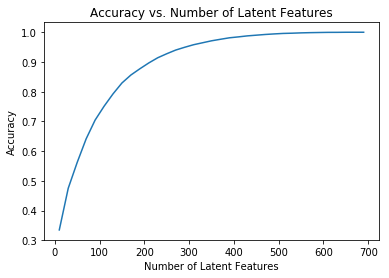

In [13]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

`4.` 通过上述单元格，我们无法判断要使用多少个潜在特征，因为能够更好地预测矩阵的 1 和 0 值，并不表明我们就能做出很好的推荐。我们可以将数据集划分为训练集和测试集，如以下单元格所示。  

根据第三个问题的代码判断，不同的潜在特征数量对训练集和测试集的准确率有何影响。使用以下划分方法： 

* 我们可以对测试集中的多少个用户做出预测？  
* 由于冷启动问题，我们无法对多少个用户做出预测？
* 我们可以对测试集中的多少篇文章做出预测？  
* 由于冷启动问题，我们无法对多少篇文章做出预测？

In [11]:
user_item_test = create_user_item_matrix(df_test)
user_item_test.head()

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1432.0,1433.0,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1443.0
user_id,,,,,,,,,,,,,,,,,,,,,
2917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3024,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
user_item_test.index

Int64Index([2917, 3024, 3093, 3193, 3527, 3532, 3684, 3740, 3777, 3801,
            ...
            5140, 5141, 5142, 5143, 5144, 5145, 5146, 5147, 5148, 5149],
           dtype='int64', name='user_id', length=682)

In [18]:
user_item_test.columns

Float64Index([   0.0,    2.0,    4.0,    8.0,    9.0,   12.0,   14.0,   15.0,
                16.0,   18.0,
              ...
              1432.0, 1433.0, 1434.0, 1435.0, 1436.0, 1437.0, 1439.0, 1440.0,
              1441.0, 1443.0],
             dtype='float64', name='article_id', length=574)

In [19]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
                Int64Index([2917, 3024, 3093, 3193, 3527, 3532, 3684, 3740, 3777, 3801,
                ...
                5140, 5141, 5142, 5143, 5144, 5145, 5146, 5147, 5148, 5149],
               dtype='int64', name='user_id', length=682)
    test_arts - all of the test article ids
              Float64Index([   0.0,    2.0,    4.0,    8.0,    9.0,   12.0,   14.0,   15.0,
                16.0,   18.0,
              ...
              1432.0, 1433.0, 1434.0, 1435.0, 1436.0, 1437.0, 1439.0, 1440.0,
              1441.0, 1443.0],
             dtype='float64', name='article_id', length=574)
    
    '''
    # Your code here
    
    user_item_train = create_user_item_matrix(df_train)
    
    user_item_test = create_user_item_matrix(df_test)
    
    test_idx = user_item_test.index
    
    test_arts = user_item_test.columns
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

In [24]:
# 在test里面的user_id也在user_item_train里面（我们可以对测试集中的多少个用户做出预测？）
len(np.intersect1d(test_idx, user_item_train.index, assume_unique=True))

20

In [25]:
# 在test里面的user_id不在user_item_train里面（无法对多少个用户做出预测？）
len(user_item_test.index) - len(np.intersect1d(test_idx, user_item_train.index, assume_unique=True))

662

In [26]:
# 在test里面的article_id也在user_item_train里面（我们可以对测试集中的多少个文章做出预测？）
len(np.intersect1d(test_arts, user_item_train.columns, assume_unique=True))

574

In [27]:
# 在test里面的article_id不在user_item_train里面（无法对多少个文章做出预测？）
len(user_item_test.columns) - len(np.intersect1d(test_arts, user_item_train.columns, assume_unique=True))

0

In [29]:
# Replace the values in the dictionary below
a = 662 
b = 574 
c = 20 
d = 0 


sol_4_dict = {
    'How many users can we make predictions for in the test set?': c, 
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a, 
    'How many articles can we make predictions for in the test set?': b,
    'How many articles in the test set are we not able to make predictions for because of the cold start problem?': d
}

t.sol_4_test(sol_4_dict)

KeyError: 'How many movies can we make predictions for in the test set?'

`5.` 现在对上述 **user_item_train** 数据集进行奇异值分解，并得出 U、S 和 V 转置矩阵。然后判断在使用不同的潜在特征数量时，可以使用此矩阵分解方法对 **user_item_test** 数据集中的多少行做出预测，并根据测试数据的准确率确定应该保留多少个潜在特征。这个问题需要运用在第 `2` - `4`.个问题中完成的步骤。

通过以下单元格了解 SVD 在测试数据上做出推荐预测的效果如何。

In [ ]:
# fit SVD on the user_item_train matrix
u_train, s_train, vt_train = # fit svd similar to above then use the cells below

In [ ]:
# Use these cells to see how well you can use the training 
# decomposition to predict on test data

`6.` 在以下单元格中解释上个问题的结果。根据你得出的结果，讨论下你会如何判断上述推荐系统是否比用户目前查找文章的方式更好。 

**请在此处填写答案。**

<a id='conclusions'></a>
### 其他内容
你现在可以保存为每个用户推荐的文章，开发一个类来作出新的预测并更新结果，以及创建一个部署结果的应用。这些任务并不是此项目必须完成的任务。但是，在学完课程知识后，你肯定能够继续完成这些任务并改进你的项目。


## 总结

> 恭喜！你已经完成 IBM 推荐系统项目。 

> **小贴士**：当你对项目满意后，请检查报告并看看是否满足所有[审阅标准](https://review.udacity.com/#!/rubrics/2632/view)。请删除所有的**小贴士**（例如上方小贴士），使演示尽可能流畅。


## 提交指南

> 在提交项目之前，你需要在 workspace 的此部分创建 notebook 的 .html 或 .pdf 版本。运行以下单元格即可创建这两种版本。如果操作正确，系统会返回代码 0，并且你可以在 workspace 目录（点击左上角的橙色 Jupyter 图标）中看到生成的 .html 文件。

> 或者，你可以通过**文件** > **下载为**子菜单将此报告下载为 .html 文件，然后手动将报告上传到 workspace 目录中：点击左上角的橙色 Jupyter 图标，然后点击“上传”按钮。

> 完成这些步骤后，你可以点击右下角的“提交项目”按钮，提交项目。这样便会创建和提交一个 zip 文件，其中包含此 .ipynb 文件和你创建的 .html 或 .pdf 文件。恭喜！ 


```python
from subprocess import call
call(['python', '-m', 'nbconvert', 'Recommendations_with_IBM.ipynb'])
```